In [1]:




import numpy as np
import pandas as pd
import re

from geopy.geocoders import Nominatim
from geopy.exc import GeocoderTimedOut
from geopy.geocoders import GoogleV3

import matplotlib.pyplot as plt

import seaborn as sns

from wordcloud import WordCloud




import networkx as nx



In [2]:
df = pd.read_csv('covid19_tweets_updated.csv')

df.head()



/var/folders/w6/n78q49k13z3cct9wmrgv4qd40000gn/T/ipykernel_40604/1752398413.py:1: DtypeWarning: Columns (7,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('covid19_tweets_updated.csv')


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥլϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,NaN,Twitter for iPhone,False
1,Tom Basile,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,NaN,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [3]:
print(df.head())

print(df.info())

print(df.describe())

         user_name         user_location  \
0             ᏉᎥլϮ            astroworld   
1      Tom Basile           New York, NY   
2  Time4fisticuffs      Pewee Valley, KY   
3      ethel mertz  Stuck in the Middle    
4         DIPR-J&K     Jammu and Kashmir   

                                    user_description         user_created  \
0  wednesday addams as a disney princess keepin i...  2017-05-26 05:46:42   
1  Husband, Father, Columnist & Commentator. Auth...  2009-04-16 20:06:23   
2  #Christian #Catholic #Conservative #Reagan #Re...  2009-02-28 18:57:41   
3  #Browns #Indians #ClevelandProud #[]_[] #Cavs ...  2019-03-07 01:45:06   
4  🖊️Official Twitter handle of Department of Inf...  2017-02-12 06:45:15   

   user_followers  user_friends  user_favourites user_verified  \
0           624.0         950.0          18775.0         False   
1          2253.0        1677.0             24.0          True   
2          9275.0        9525.0           7254.0         False   
3       

In [4]:
# Direct assignment to handle missing values efficiently
df['user_location'] = df['user_location'].fillna('Unknown')
df['user_description'] = df['user_description'].fillna('No description')
# Assuming you might also want to fill missing 'hashtags' with 'No hashtags'
df['hashtags'] = df['hashtags'].fillna('No hashtags')

# For numerical columns with missing values, filling with median or 0, depending on the context
num_columns = ['user_followers', 'user_friends', 'user_favourites']
for col in num_columns:
    df[col] = df[col].fillna(df[col].median())

# My Notebook

This is an *automatically generated* notebook.


In [5]:
df.dropna(subset=['user_created', 'date'], inplace=True)

df.head()


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥլϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,No hashtags,Twitter for iPhone,False
1,Tom Basile,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,No hashtags,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False


In [6]:
# Find indices of all rows where 'user_created' is not in a correct date format
incorrect_dates = pd.to_datetime(df['user_created'], errors='coerce').isna()

# Display these rows to assess the extent of the problem
print(df[incorrect_dates])

# Depending on the assessment, decide whether to remove or correct them
df = df[~incorrect_dates]  # Remove rows with incorrect 'user_created' dates

Empty DataFrame
Columns: [user_name, user_location, user_description, user_created, user_followers, user_friends, user_favourites, user_verified, date, text, hashtags, source, is_retweet]
Index: []


In [7]:
df['user_created'] = pd.to_datetime(df['user_created'], errors='coerce')
# Repeat for any other date columns as necessary

# Final check to ensure cleanliness
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 179108 entries, 0 to 179112
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         178687 non-null  object        
 1   user_location     179108 non-null  object        
 2   user_description  179108 non-null  object        
 3   user_created      179108 non-null  datetime64[ns]
 4   user_followers    179108 non-null  float64       
 5   user_friends      179108 non-null  float64       
 6   user_favourites   179108 non-null  float64       
 7   user_verified     179108 non-null  object        
 8   date              179108 non-null  object        
 9   text              179108 non-null  object        
 10  hashtags          179108 non-null  object        
 11  source            179028 non-null  object        
 12  is_retweet        179105 non-null  object        
dtypes: datetime64[ns](1), float64(3), object(9)
memory usage: 19.1+ 

In [8]:
# Instead of using inplace=True, use direct assignment for filling missing values
df['user_name'] = df['user_name'].fillna('Unknown')
df['source'] = df['source'].fillna('Unknown')

# For 'is_retweet', fill missing values with False and convert to bool
# This avoids the warning about downcasting by first filling and then converting types
df['is_retweet'] = df['is_retweet'].fillna(False)
df['is_retweet'] = df['is_retweet'].astype(bool)

# Ensure 'user_verified' is boolean
df['user_verified'] = df['user_verified'].astype(bool)

# Convert 'date' column to datetime, handling errors with 'coerce' to avoid conversion issues
df['date'] = pd.to_datetime(df['date'], errors='coerce')

/var/folders/w6/n78q49k13z3cct9wmrgv4qd40000gn/T/ipykernel_40604/3039823793.py:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['is_retweet'] = df['is_retweet'].fillna(False)


In [9]:
print(df.info())

df.head(30)

<class 'pandas.core.frame.DataFrame'>
Index: 179108 entries, 0 to 179112
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         179108 non-null  object        
 1   user_location     179108 non-null  object        
 2   user_description  179108 non-null  object        
 3   user_created      179108 non-null  datetime64[ns]
 4   user_followers    179108 non-null  float64       
 5   user_friends      179108 non-null  float64       
 6   user_favourites   179108 non-null  float64       
 7   user_verified     179108 non-null  bool          
 8   date              179108 non-null  datetime64[ns]
 9   text              179108 non-null  object        
 10  hashtags          179108 non-null  object        
 11  source            179108 non-null  object        
 12  is_retweet        179108 non-null  bool          
dtypes: bool(2), datetime64[ns](2), float64(3), object(6)
memory usag

,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,ᏉᎥլϮ,astroworld,wednesday addams as a disney princess keepin i...,2017-05-26 05:46:42,624.0,950.0,18775.0,False,2020-07-25 12:27:21,If I smelled the scent of hand sanitizers toda...,No hashtags,Twitter for iPhone,False
1,Tom Basile,"New York, NY","Husband, Father, Columnist & Commentator. Auth...",2009-04-16 20:06:23,2253.0,1677.0,24.0,True,2020-07-25 12:27:17,Hey @Yankees @YankeesPR and @MLB - wouldn't it...,No hashtags,Twitter for Android,False
2,Time4fisticuffs,"Pewee Valley, KY",#Christian #Catholic #Conservative #Reagan #Re...,2009-02-28 18:57:41,9275.0,9525.0,7254.0,False,2020-07-25 12:27:14,@diane3443 @wdunlap @realDonaldTrump Trump nev...,['COVID19'],Twitter for Android,False
3,ethel mertz,Stuck in the Middle,#Browns #Indians #ClevelandProud #[]_[] #Cavs ...,2019-03-07 01:45:06,197.0,987.0,1488.0,False,2020-07-25 12:27:10,@brookbanktv The one gift #COVID19 has give me...,['COVID19'],Twitter for iPhone,False
4,DIPR-J&K,Jammu and Kashmir,🖊️Official Twitter handle of Department of Inf...,2017-02-12 06:45:15,101009.0,168.0,101.0,False,2020-07-25 12:27:08,25 July : Media Bulletin on Novel #CoronaVirus...,"['CoronaVirusUpdates', 'COVID19']",Twitter for Android,False
5,Franz Schubert,Новоро́ссия,🎼 #Новоро́ссия #Novorossiya #оставайсядома #S...,2018-03-19 16:29:52,1180.0,1071.0,1287.0,False,2020-07-25 12:27:06,#coronavirus #covid19 deaths continue to rise....,"['coronavirus', 'covid19']",Twitter Web App,False
6,hr bartender,"Gainesville, FL",Workplace tips and advice served up in a frien...,2008-08-12 18:19:49,79956.0,54810.0,3801.0,False,2020-07-25 12:27:03,How #COVID19 Will Change Work in General (and ...,"['COVID19', 'Recruiting']",Buffer,False
7,Derbyshire LPC,Unknown,No description,2012-02-03 18:08:10,608.0,355.0,95.0,False,2020-07-25 12:27:00,You now have to wear face coverings when out s...,No hashtags,TweetDeck,False
8,Prathamesh Bendre,Unknown,"A poet, reiki practitioner and a student of law.",2015-04-25 08:15:41,25.0,29.0,18.0,False,2020-07-25 12:26:59,Praying for good health and recovery of @Chouh...,"['covid19', 'covidPositive']",Twitter for Android,False
9,Member of Christ,👇🏻location at link below👇🏻,"Just as the body is one & has many members, & ...",2014-08-17 04:53:22,55201.0,34239.0,29802.0,False,2020-07-25 12:26:54,POPE AS GOD - Prophet Sadhu Sundar Selvaraj. W...,"['HurricaneHanna', 'COVID19']",Twitter for iPhone,False


In [10]:
df['user_verified'] = df['user_verified'].astype(int)
df['is_retweet'] = df['is_retweet'].astype(int)



In [11]:
def remove_emojis(text):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F700-\U0001F77F"  # alchemical symbols
                               u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                               u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                               u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                               u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                               u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                               u"\U00002702-\U000027B0"  # Dingbats
                               u"\U000024C2-\U0001F251"  # Enclosed Characters
                               u"\U000023F3"              # Hourglass
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [12]:
def remove_trademark_symbols(text):
    trademark_pattern = re.compile(r'\b(\w+)\s*[™®©]\b', flags=re.IGNORECASE)
    return re.sub(trademark_pattern, r'\1', text)

def replace_special_chars(text):
    special_char_pattern = re.compile("[.@|!#$%^&*()<>?/-_+}{~:,]")
    return special_char_pattern.sub(' ', text)

def clean_value(value):
    if pd.isna(value) or value.strip() == "" or not value:
        return "Unknown"
    cleaned_value = re.sub(r'[^\w\s]', '', value)  # Remove punctuation and special characters
    cleaned_value = cleaned_value.strip('. ')
    cleaned_value = re.sub(r'[˙•˚]', '', cleaned_value)
    cleaned_value = re.sub(r'®|™', '', cleaned_value)
    cleaned_value = re.sub(r'[0-9⃣⁷]', '', cleaned_value)
    cleaned_value = ' '.join(cleaned_value.split())  # Remove extra spaces
    return cleaned_value


# Applying all text cleaning functions in a single step for each relevant column
df['text'] = df['text'].apply(lambda x: replace_special_chars(remove_trademark_symbols(remove_emojis(x))))
df['user_name'] = df['user_name'].apply(clean_value)
df['user_description'] = df['user_description'].apply(clean_value)


In [13]:
df.head()
print(df.info())


<class 'pandas.core.frame.DataFrame'>
Index: 179108 entries, 0 to 179112
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   user_name         179108 non-null  object        
 1   user_location     179108 non-null  object        
 2   user_description  179108 non-null  object        
 3   user_created      179108 non-null  datetime64[ns]
 4   user_followers    179108 non-null  float64       
 5   user_friends      179108 non-null  float64       
 6   user_favourites   179108 non-null  float64       
 7   user_verified     179108 non-null  int64         
 8   date              179108 non-null  datetime64[ns]
 9   text              179108 non-null  object        
 10  hashtags          179108 non-null  object        
 11  source            179108 non-null  object        
 12  is_retweet        179108 non-null  int64         
dtypes: datetime64[ns](2), float64(3), int64(2), object(6)
memory usa

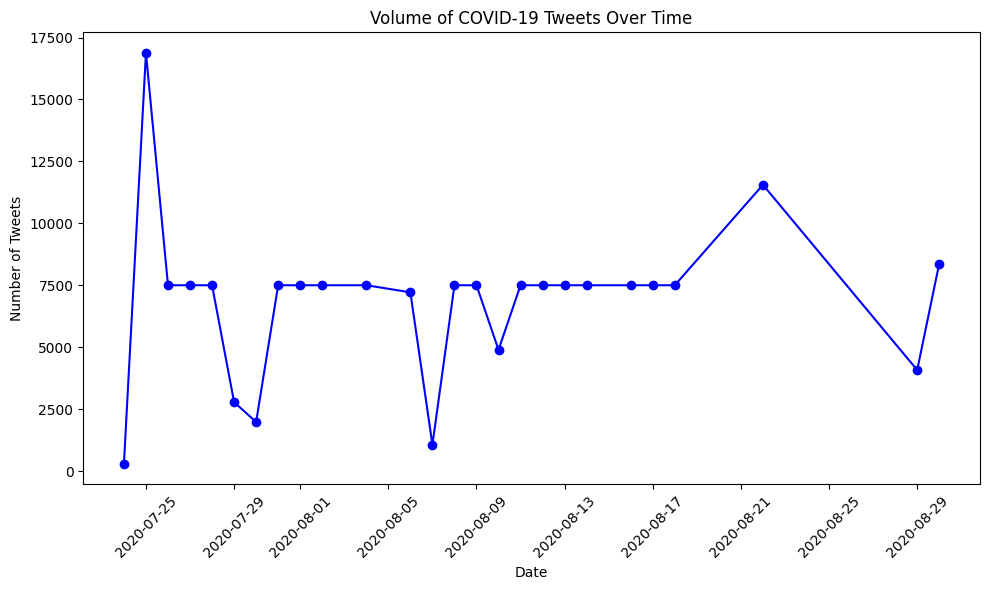

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Create a new column to store just the date part
df['tweet_date'] = df['date'].dt.date

# Count the number of tweets per day
tweets_per_day = df.groupby('tweet_date').size()

# Plotting
plt.figure(figsize=(10, 6))
tweets_per_day.plot(kind='line', color='blue', marker='o')
plt.title('Volume of COVID-19 Tweets Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

/var/folders/w6/n78q49k13z3cct9wmrgv4qd40000gn/T/ipykernel_40604/3813073566.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


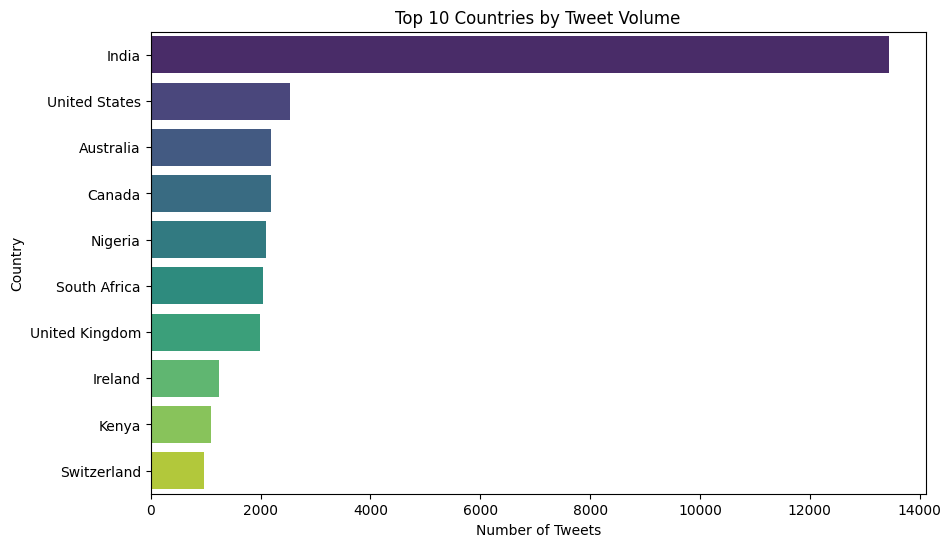

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'user_location' is the column of interest

# A list of all country names to filter out valid countries from the 'user_location' column
# This list should be comprehensive and contain all possible countries mentioned in the dataset
countries_list = ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Korea', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta', 'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Myanmar', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine', 'Panama', 'Papua New Guinea', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles', 'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Sudan', 'Spain', 'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Taiwan', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga', 'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Vatican City', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe']

# Function to extract country from the 'user_location' string
def extract_country(location):
    # Split the location string by commas and take the last element as the country
    possible_country = location.split(',')[-1].strip()
    # Check if the possible country is in the list of countries
    if possible_country in countries_list:
        return possible_country
    return None

# Apply the function to the 'user_location' column and create a new 'country' column
df['country'] = df['user_location'].apply(lambda x: extract_country(x))

# Filter out rows where the country is None (i.e., not listed or not recognized)
df_countries = df[df['country'].notna()]

# Get the top 10 countries by tweet count
top_countries = df_countries['country'].value_counts().head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.title('Top 10 Countries by Tweet Volume')
plt.xlabel('Number of Tweets')
plt.ylabel('Country')
plt.show()

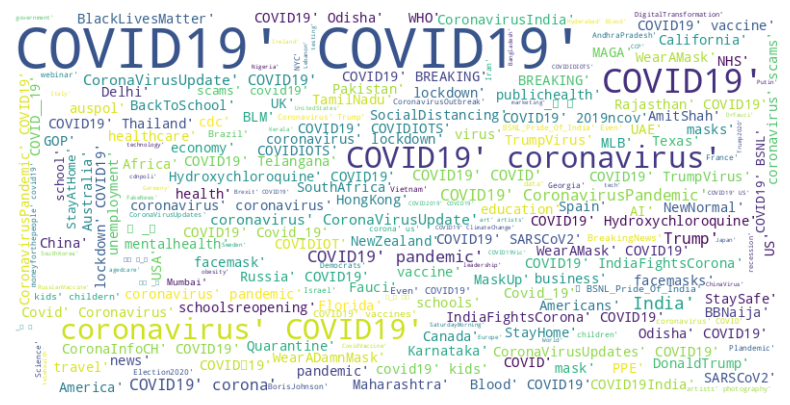

In [16]:

# Combine all hashtags into a single string
all_hashtags = ' '.join(list(df[df['hashtags'] != 'No hashtags']['hashtags']))

# Generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(all_hashtags)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

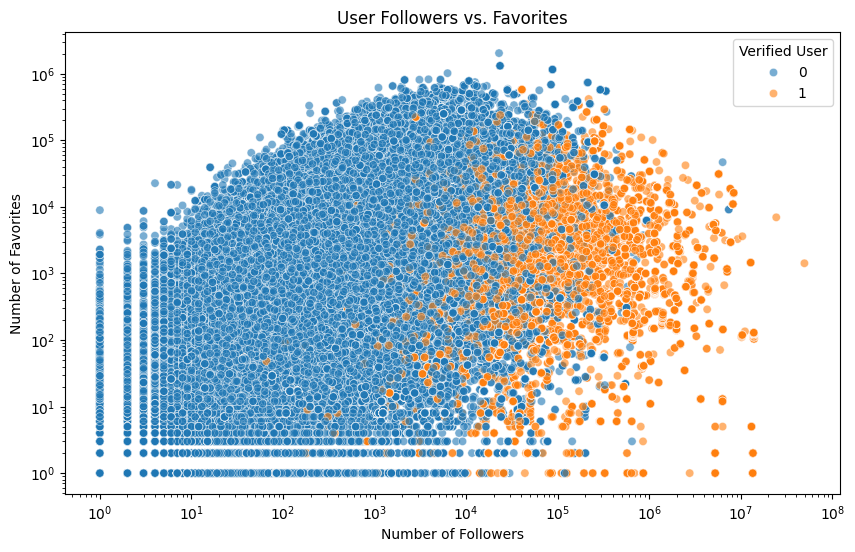

In [17]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='user_followers', y='user_favourites', hue='user_verified', alpha=0.6)
plt.title('User Followers vs. Favorites')
plt.xlabel('Number of Followers')
plt.ylabel('Number of Favorites')
plt.xscale('log')
plt.yscale('log')
plt.legend(title='Verified User')
plt.show()

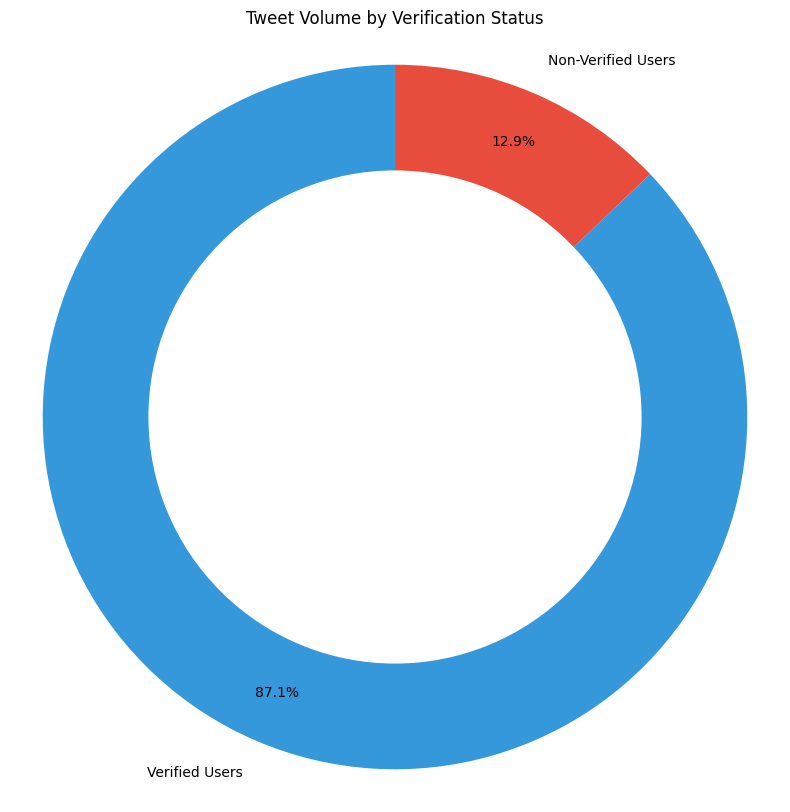

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'user_verified' is a boolean column indicating verified status

# Count the number of tweets by verified and non-verified users
tweet_counts = df['user_verified'].value_counts()

# Create labels for the pie chart
labels = ['Verified Users', 'Non-Verified Users']

# Improved colors to distinguish the slices - using a palette that's both screen and print-friendly
colors = ['#3498db', '#e74c3c']  # Blue for verified, Red for non-verified

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(tweet_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, pctdistance=0.85)

# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')
plt.tight_layout()
plt.title('Tweet Volume by Verification Status')
plt.show()


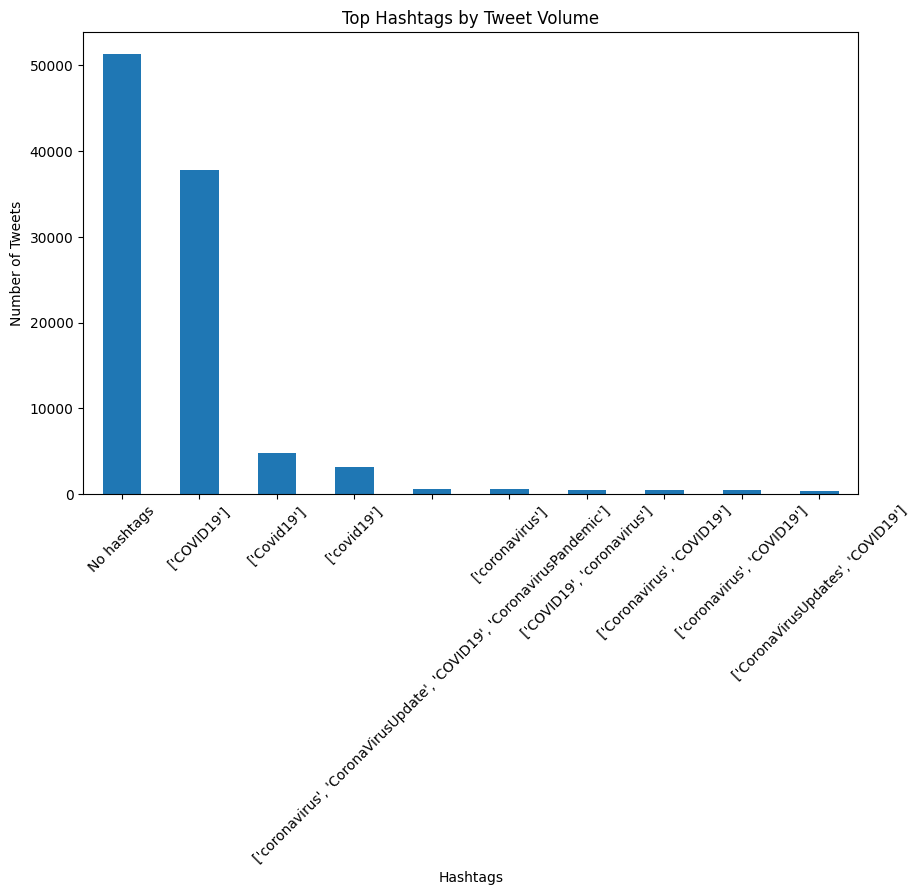

In [19]:
top_hashtags = df.explode('hashtags')['hashtags'].value_counts().head(10)
top_hashtags.plot(kind='bar', figsize=(10, 6))
plt.title('Top Hashtags by Tweet Volume')
plt.xlabel('Hashtags')
plt.ylabel('Number of Tweets')
plt.xticks(rotation=45)
plt.show()

In [20]:
import pandas as pd
import folium
from folium.plugins import HeatMap
from geopy.geocoders import Nominatim

# Initialize the geocoder
geolocator = Nominatim(user_agent="geoapiExercises")

# Assuming df is your DataFrame and 'user_location' is the column with location data
# Geocode the user_location to get latitude and longitude
def geocode_location(location):
    try:
        geo = geolocator.geocode(location)
        return (geo.latitude, geo.longitude)
    except:
        return (None, None)

# Apply the function to the 'user_location' column
df['coords'] = df['user_location'].apply(geocode_location)

# Drop rows where coordinates are None
df = df.dropna(subset=['coords'])

# Create a map centered around a point (you can choose a default location if geocoding is not possible)
default_location = [0, 0]  # Example: center of the map
m = folium.Map(location=default_location, zoom_start=2)

# Create a list of coordinate pairs
heat_data = [coords for coords in df['coords'] if coords != (None, None)]

# Add the heatmap layer to the map
HeatMap(heat_data).add_to(m)

# Display the map
m.save('heatmap.html')

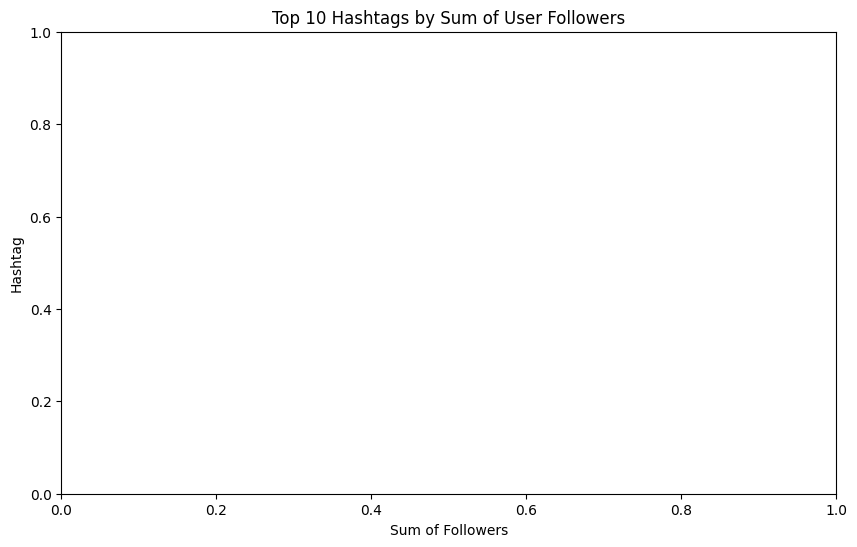

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df is your DataFrame and 'hashtags' and 'user_followers' are the columns of interest

# Since the 'hashtags' column is already a list, we can directly explode the DataFrame
df_exploded = df.explode('hashtags')

# Group by the hashtag and sum the followers of all users who used that hashtag
hashtag_followers = df_exploded.groupby('hashtags')['user_followers'].sum().reset_index()

# Sort the hashtags by the sum of followers
hashtag_followers_sorted = hashtag_followers.sort_values(by='user_followers', ascending=False)

# Get the top 10 hashtags by sum of followers
top_hashtags_by_followers = hashtag_followers_sorted.head(10)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='user_followers', y='hashtags', data=top_hashtags_by_followers, palette='viridis')
plt.title('Top 10 Hashtags by Sum of User Followers')
plt.xlabel('Sum of Followers')
plt.ylabel('Hashtag')
plt.show()


In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
# Replace NaN values in 'hashtags' column with empty lists using apply
df['hashtags'] = df['hashtags'].apply(lambda x: x if isinstance(x, list) else [])

# Create a graph
G = nx.Graph()

# Initialize sets to hold unique hashtags and locations
hashtags_set = set()
locations_set = set()
edges = []

# Loop through the DataFrame rows to populate sets and edge list
for hashtags, location in zip(df['hashtags'], df['user_location']):
    # Ensure the location is added to the set
    locations_set.add(location)
    for hashtag in hashtags:
        hashtags_set.add(hashtag)
        edges.append((hashtag, location))

# Add nodes and edges to the graph
G.add_nodes_from(hashtags_set, type='hashtag')
G.add_nodes_from(locations_set, type='location')
G.add_edges_from(edges)

# Output some graph statistics
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

# Find the most connected hashtags
degree_centrality = nx.degree_centrality(G)
sorted_hashtags = [(node, centrality) for node, centrality in degree_centrality.items() if G.nodes[node].get('type') == 'hashtag']
sorted_hashtags.sort(key=lambda x: x[1], reverse=True)

print("Most connected hashtags:")
for hashtag, degree in sorted_hashtags[:10]:
    print(f"{hashtag}: {degree:.2f}")

# Visualization
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G, k=0.15)  # Position nodes using the spring layout algorithm
nx.draw(G, pos, node_color='skyblue', node_size=20, with_labels=False)
plt.show()


Number of nodes: 26924
Number of edges: 0
Most connected hashtags:


KeyboardInterrupt: 

<Figure size 1000x800 with 0 Axes>

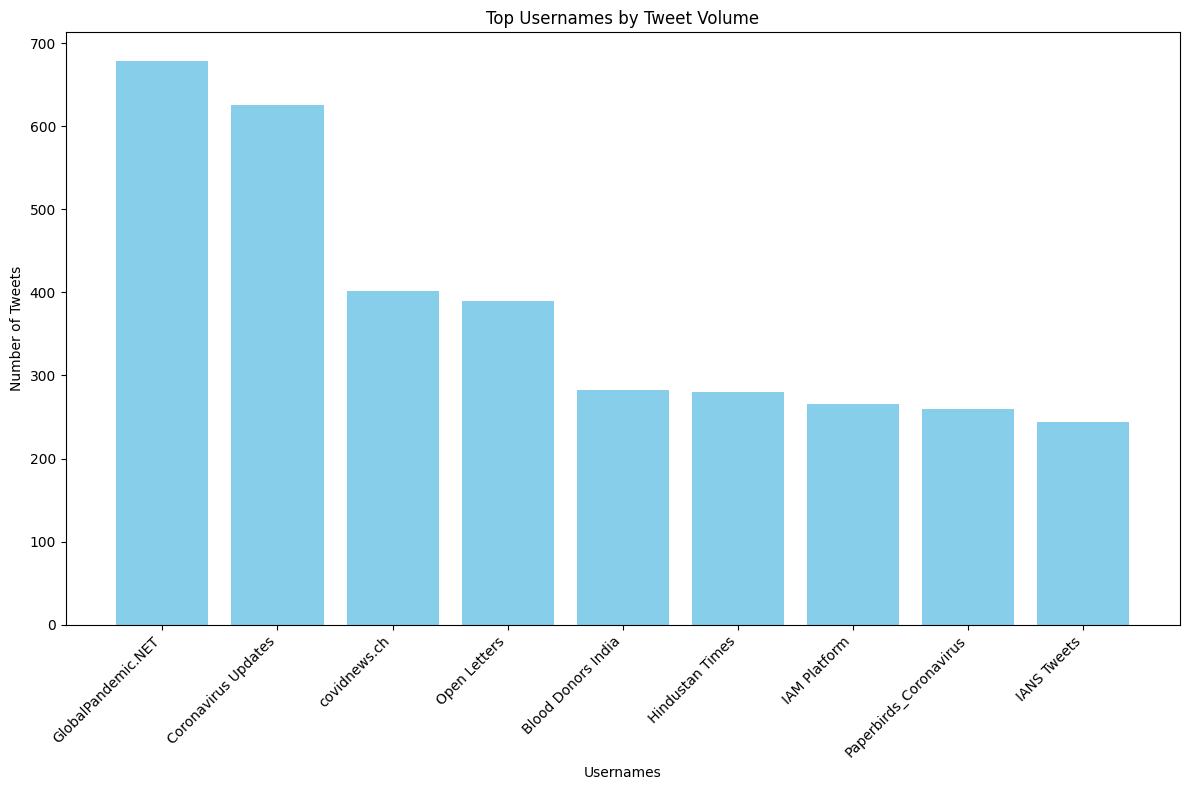

In [ ]:
tweet_counts_by_user = df.groupby('user_name').size().reset_index(name='tweet_count')

# Sort the users by tweet count in descending order
tweet_counts_by_user = tweet_counts_by_user.sort_values(by='tweet_count', ascending=False)

# Select the top N users you want to visualize, for example, the top 10
top_users = tweet_counts_by_user.head(9)

# Create the bar chart
plt.figure(figsize=(12, 8))
plt.bar(top_users['user_name'], top_users['tweet_count'], color='skyblue')
plt.xlabel('Usernames')
plt.ylabel('Number of Tweets')
plt.title('Top Usernames by Tweet Volume')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the layout to fit the x-axis labels
plt.show()